In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 15

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# Model 1: 3 conv layers

In [5]:
# https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
#model1.add(Conv2D(32, (2, 2), activation='relu'))
#model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Conv2D(64, kernel_size=(2, 2),
                 activation='relu'))
#model1.add(Conv2D(64, (2, 2), activation='relu'))
#model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Conv2D(128, kernel_size=(2, 2),
                 activation='relu'))
#model1.add(Conv2D(128, (2, 2), activation='relu'))
#model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.summary()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 64)        0    

In [6]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score1 = model1.evaluate(x_test, y_test, verbose=0)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 762s 13ms/step - loss: 0.4130 - acc: 0.8945 - val_loss: 0.3919 - val_acc: 0.9544
Epoch 2/15
60000/60000 [==============================] - 782s 13ms/step - loss: 0.2209 - acc: 0.9475 - val_loss: 0.3067 - val_acc: 0.9631
Epoch 3/15
60000/60000 [==============================] - 721s 12ms/step - loss: 0.1760 - acc: 0.9595 - val_loss: 0.0936 - val_acc: 0.9812
Epoch 4/15
60000/60000 [==============================] - 696s 12ms/step - loss: 0.1483 - acc: 0.9659 - val_loss: 0.1221 - val_acc: 0.9843
Epoch 5/15
60000/60000 [==============================] - 709s 12ms/step - loss: 0.1361 - acc: 0.9680 - val_loss: 0.0883 - val_acc: 0.9849
Epoch 6/15
60000/60000 [==============================] - 698s 12ms/step - loss: 0.1156 - acc: 0.9726 - val_loss: 0.0898 - val_acc: 0.9841
Epoch 7/15
60000/6

Test Loss: 0.06833062314643157
Test Accuracy: 0.9875


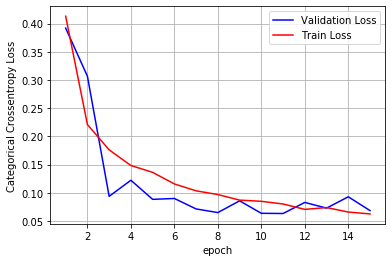

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Test Loss:', score1[0]) 
print('Test Accuracy:', score1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history1.history['val_loss']
ty = history1.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model 2: 5 conv layers

In [5]:
# https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

model2 = Sequential()

model2.add(Conv2D(8, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model2.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu'))
#model2.add(Conv2D(16, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
#model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
#model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
#model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
dense_1 (Dense)              (None, 26, 26, 32)        288       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64 

In [6]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score2 = model2.evaluate(x_test, y_test, verbose=0)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 565s 9ms/step - loss: 0.3019 - acc: 0.9126 - val_loss: 0.0859 - val_acc: 0.9801
Epoch 2/15
60000/60000 [==============================] - 569s 9ms/step - loss: 0.1150 - acc: 0.9692 - val_loss: 0.0500 - val_acc: 0.9857
Epoch 3/15
60000/60000 [==============================] - 568s 9ms/step - loss: 0.0797 - acc: 0.9776 - val_loss: 0.0823 - val_acc: 0.9855
Epoch 4/15
60000/60000 [==============================] - 564s 9ms/step - loss: 0.0680 - acc: 0.9811 - val_loss: 0.0491 - val_acc: 0.9888
Epoch 5/15
60000/60000 [==============================] - 568s 9ms/step - loss: 0.0552 - acc: 0.9844 - val_loss: 0.0319 - val_acc: 0.9911
Epoch 6/15
60000/60000 [==============================] - 565s 9ms/step - loss: 0.0497 - acc: 0.9859 - val_loss: 0.0461 - val_acc: 0.9912
Epoch 7/15
60000/60000 [

Test Loss: 0.04322146709871818
Test Accuracy: 0.9926


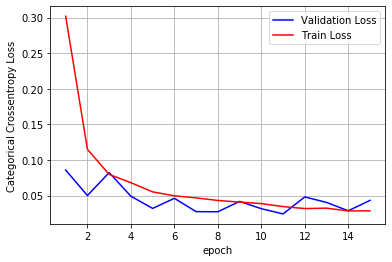

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Test Loss:', score2[0]) 
print('Test Accuracy:', score2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model 3: 7 conv layers

In [5]:
# https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

model3 = Sequential()

model3.add(Conv2D(8, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
#model3.add(Conv2D(8, (5, 5), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Dense(8, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model3.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu'))
#model3.add(Conv2D(16, (5, 5), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model3.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu'))
#model3.add(Conv2D(32, (5, 5), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model3.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu'))
#model3.add(Conv2D(64, (5, 5), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model3.add(Conv2D(128, kernel_size=(5, 5),
                 activation='relu'))
#model3.add(Conv2D(128, (5, 5), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model3.add(Conv2D(256, kernel_size=(5, 5),
                 activation='relu'))
#model3.add(Conv2D(256, (5, 5), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model3.add(Conv2D(512, kernel_size=(5, 5),
                 activation='relu'))
#model3.add(Conv2D(512, (5, 5), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

model3.summary()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 8)         40        
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 27, 8)         0         
_________________________________________________________________
dense_1 (Dense)              (None, 27, 27, 8)         72        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 16)        3216      
_________________________________________________________________
batch_normalization_2 (Batch (None, 23, 23, 16)        64 

In [6]:
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score3 = model3.evaluate(x_test, y_test, verbose=0)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1722s 29ms/step - loss: 0.4641 - acc: 0.8587 - val_loss: 0.1586 - val_acc: 0.9645
Epoch 2/15
60000/60000 [==============================] - 1719s 29ms/step - loss: 0.1045 - acc: 0.9691 - val_loss: 0.0992 - val_acc: 0.9759
Epoch 3/15
60000/60000 [==============================] - 1727s 29ms/step - loss: 0.0741 - acc: 0.9780 - val_loss: 0.0832 - val_acc: 0.9776
Epoch 4/15
60000/60000 [==============================] - 1740s 29ms/step - loss: 0.0604 - acc: 0.9821 - val_loss: 0.0677 - val_acc: 0.9826
Epoch 5/15
60000/60000 [==============================] - 1732s 29ms/step - loss: 0.0539 - acc: 0.9848 - val_loss: 0.0474 - val_acc: 0.9870
Epoch 6/15
60000/60000 [==============================] - 1722s 29ms/step - loss: 0.0475 - acc: 0.9858 - val_loss: 0.0376 - val_acc: 0.9906
Epoch 7/15
6

Test Loss: 0.027568514890003098
Test Accuracy: 0.9939


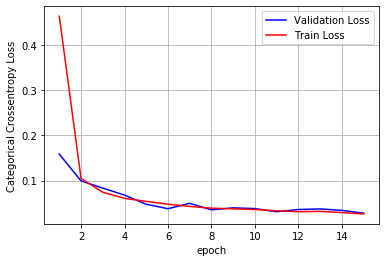

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Test Loss:', score3[0]) 
print('Test Accuracy:', score3[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion

In [2]:
from prettytable import PrettyTable

x = PrettyTable()

In [4]:
x.field_names = ['Model #', '# of Conv', 'Test Loss', 'Test Accuracy']
x.add_row(['1', '3', '0.06833062314643157', '0.9875'])
x.add_row(['2', '5', '0.04322146709871818', '0.9926'])
x.add_row(['3', '7', '0.027568514890003098', '0.9939'])

In [5]:
print(x)

+---------+-----------+----------------------+---------------+
| Model # | # of Conv |      Test Loss       | Test Accuracy |
+---------+-----------+----------------------+---------------+
|    1    |     3     | 0.06833062314643157  |     0.9875    |
|    2    |     5     | 0.04322146709871818  |     0.9926    |
|    3    |     7     | 0.027568514890003098 |     0.9939    |
+---------+-----------+----------------------+---------------+


# Summary

There are three models, model 1 has 3 convolution layers, model 2 has 5 convolution layers, model 3 has 7 convolution layers.

1. For model 1, Test Loss is 0.0683 and Test Accuracy is the lowest 0.9875.
2. For model 2, Test Loss is 0.0432 and Test Accuracy is 0.9926.
3. For model 3, Test Loss is 0.0275 and Test Accuracy is the highest 0.9939.